# MINRES

The MINRES (Minimum Residual) algorithm produces a vector of continuous coreness scores that quantify the relative positioning of nodes from the densely connected core to the sparsely connected periphery.
Nodes with higher scores are more central to the cohesive core, while lower scores indicate peripheral nodes. The scores reflect both direct and indirect ties, so a node may have high 
coreness even with few direct connections if it links to other highly embedded nodes. The distribution of scores indicates the gradation from core to periphery, with larger separations 
implying a more pronounced structure. Significance testing via permutations assesses whether the pattern of scores is greater than expected by chance. In summary, the data-driven coreness 
scores provide a nuanced measure of node positions within the latent core-periphery structure.

- Symmetric matrix A (undirected)
- Diagonal values are 0 (no self loops)

$$
Ax = b
$$

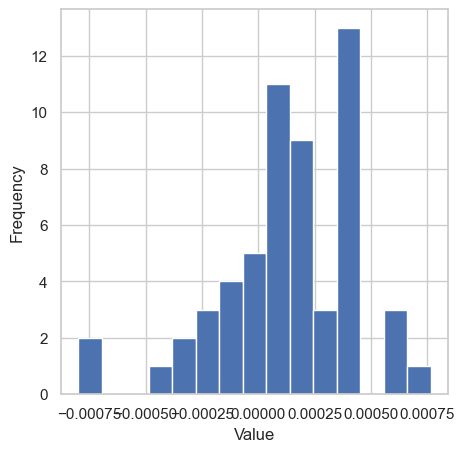

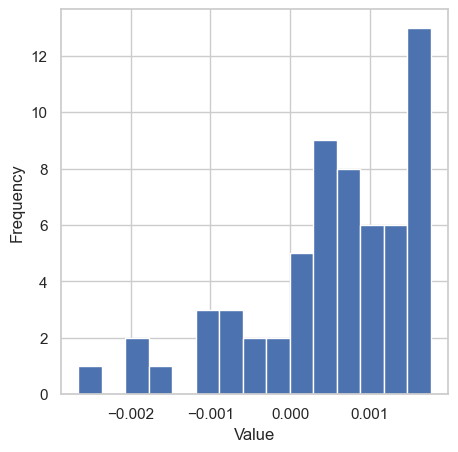

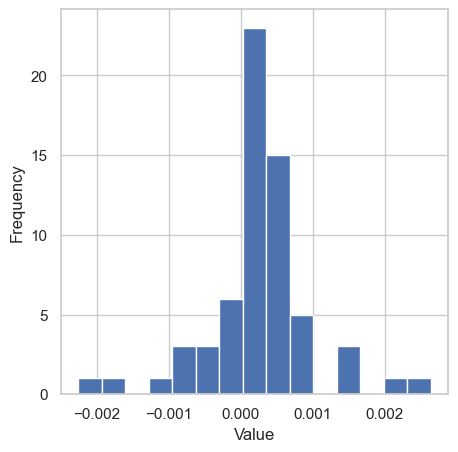

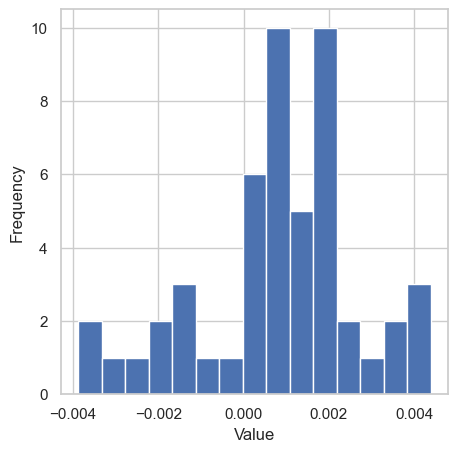

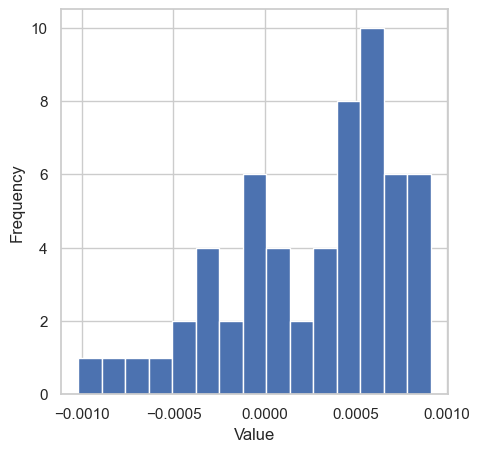

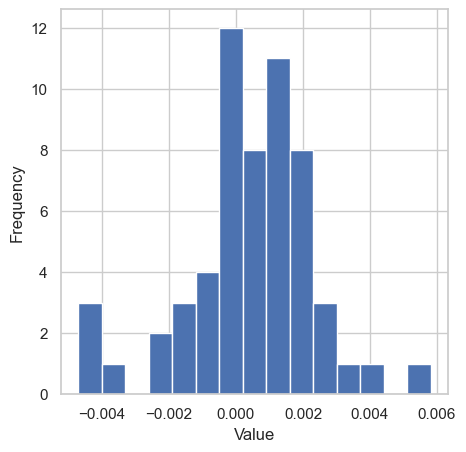

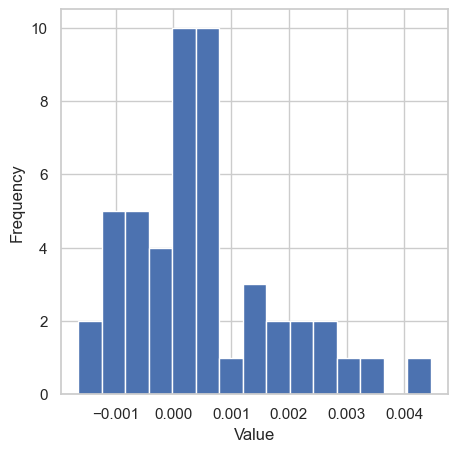

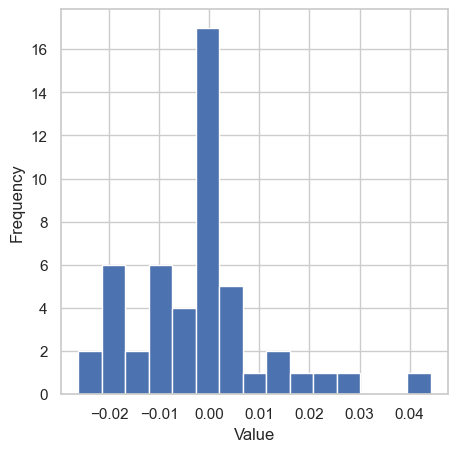

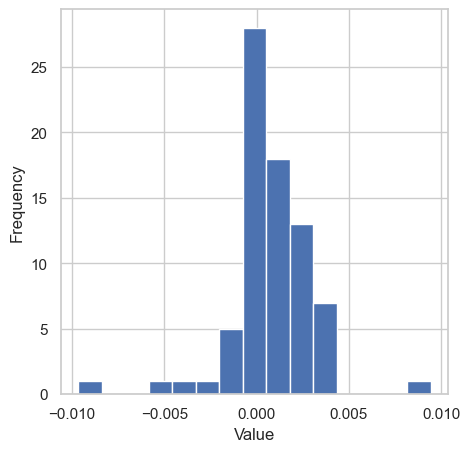

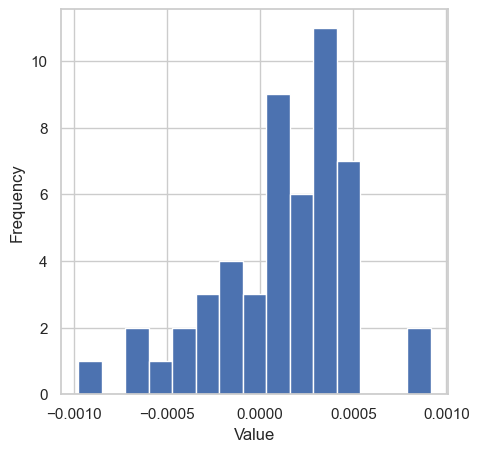

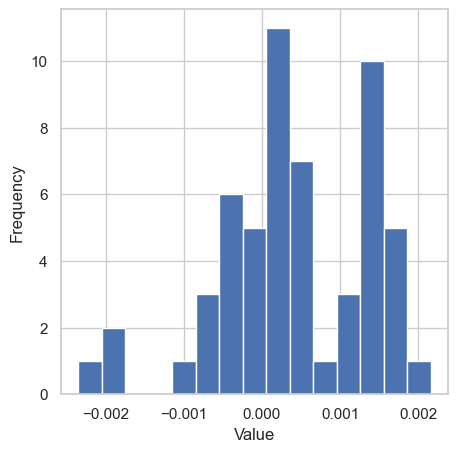

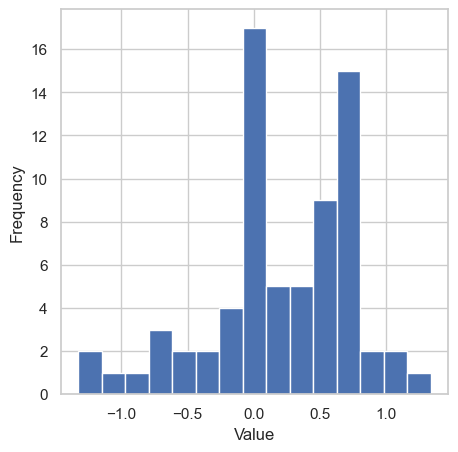

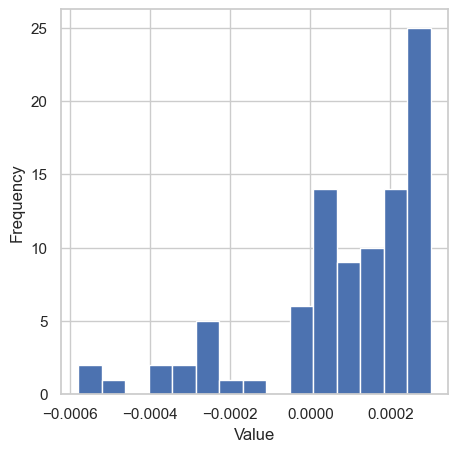

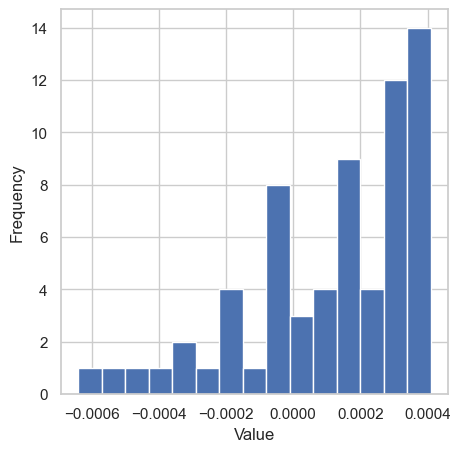

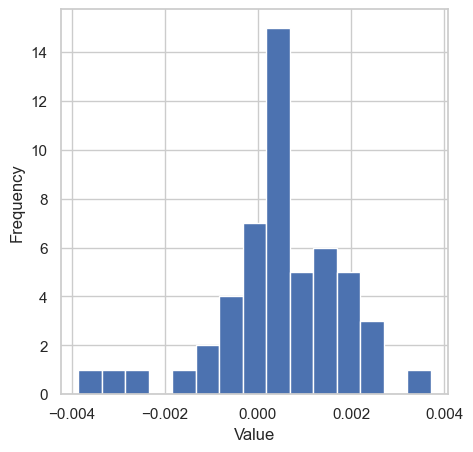

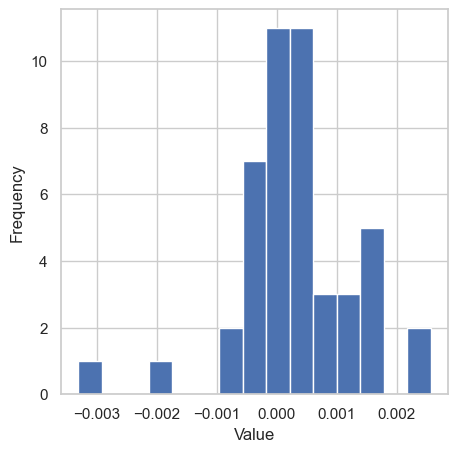

In [119]:
import networkx as nx
import scipy.sparse
from scipy.sparse.linalg import minres

sns.set_palette("tab10")
sns.set_palette("deep")

for field_name, G in Gs.items():

    A = nx.adjacency_matrix(G)  
    b = np.ones(len(G))

    x, info = minres(A, b)

    x = x / np.linalg.norm(w)

    # sns.set(style="whitegrid")
    # plt.figure(figsize=(7.5, 5))
    # sns.histplot(x, bins=15, kde=True, color='blue')
    # plt.title(f'{field_name}')
    # plt.xlabel('x')
    # plt.ylabel('Frequency')
    # plt.show()

    counts, bins = np.histogram(x, bins=15)

    plt.figure(figsize=(5, 5))
    plt.hist(bins[:-1], bins, weights=counts)

    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.show()

In [ ]:
# CORE NUMBER

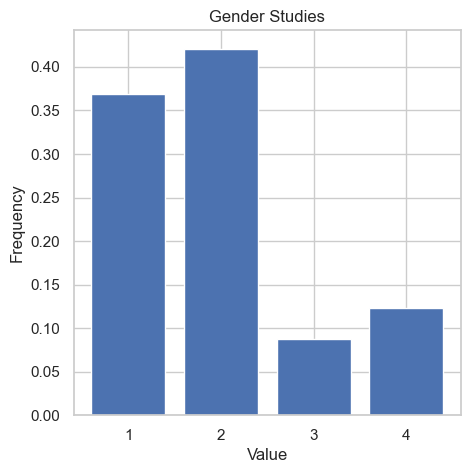

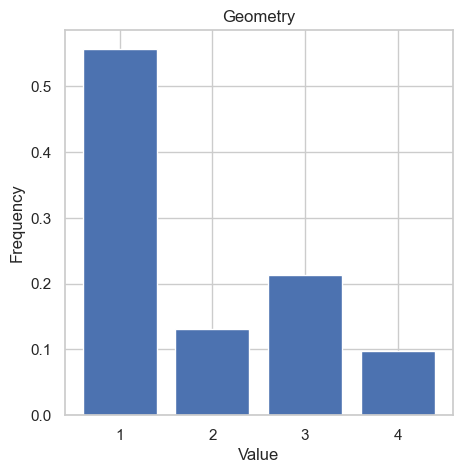

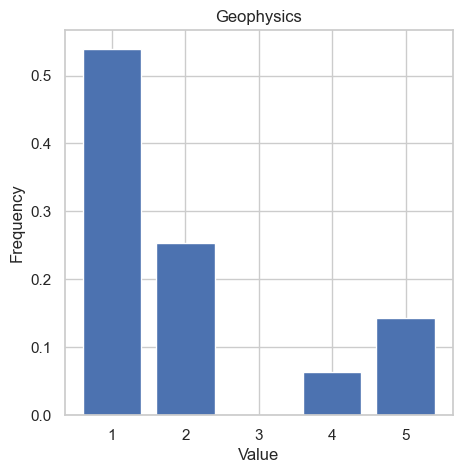

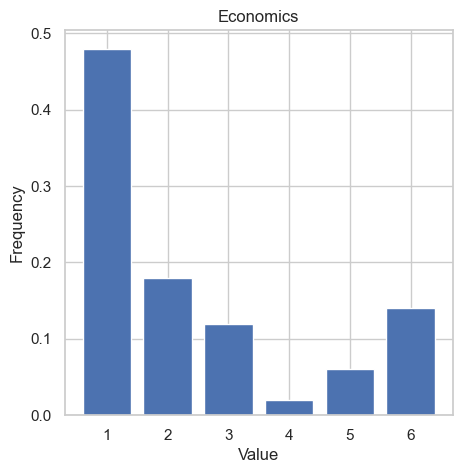

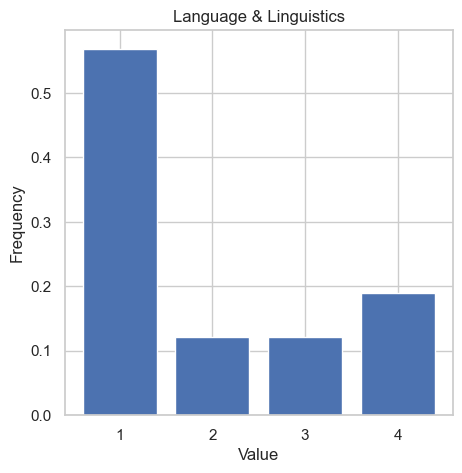

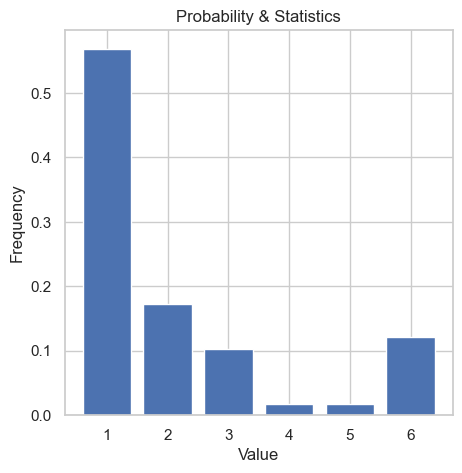

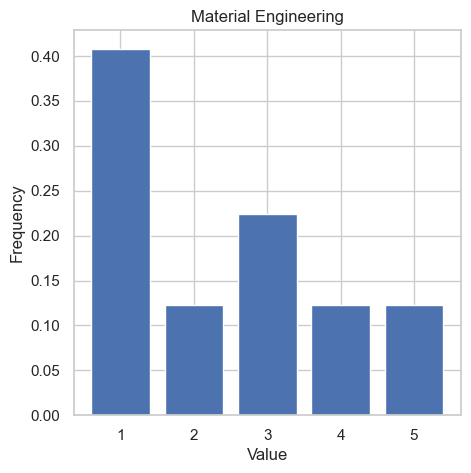

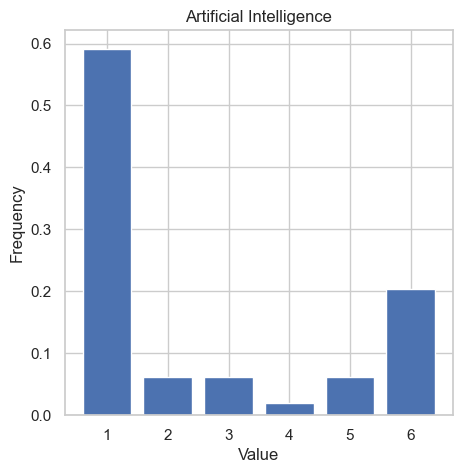

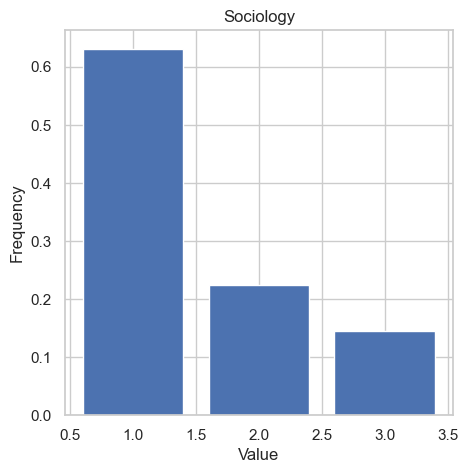

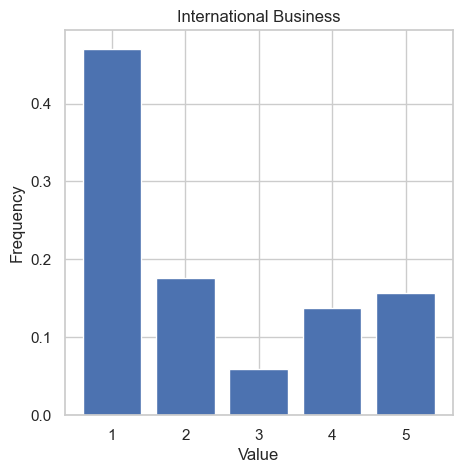

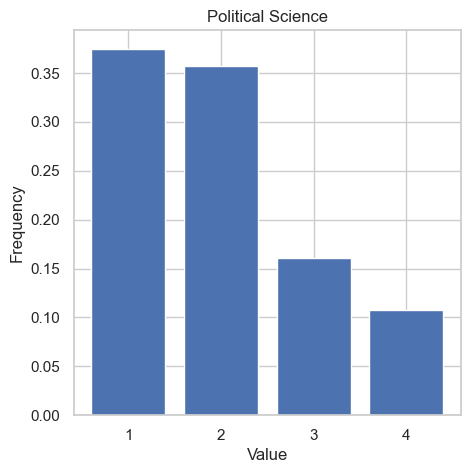

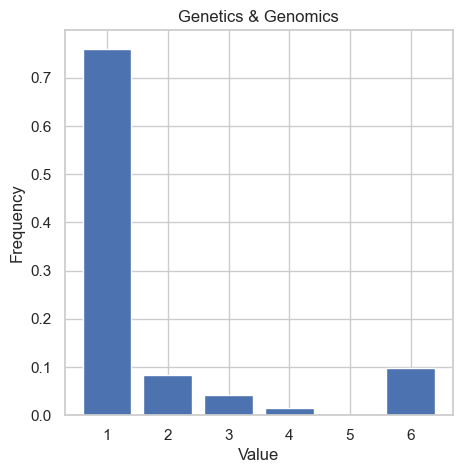

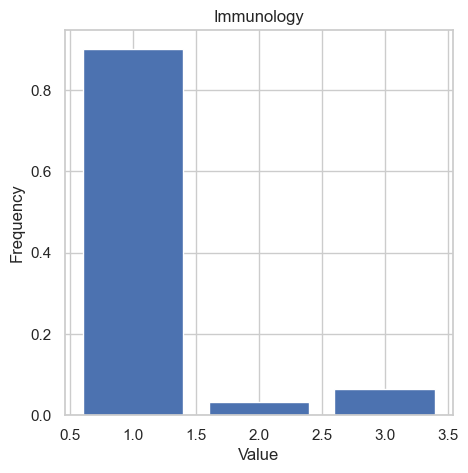

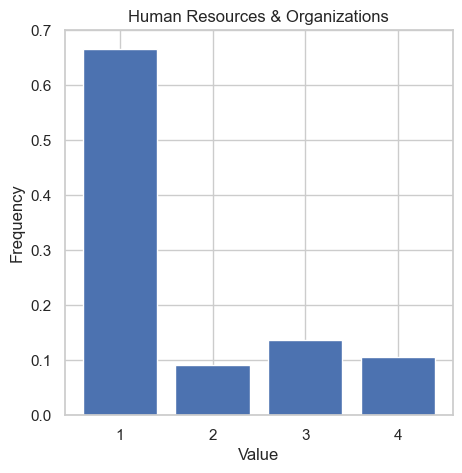

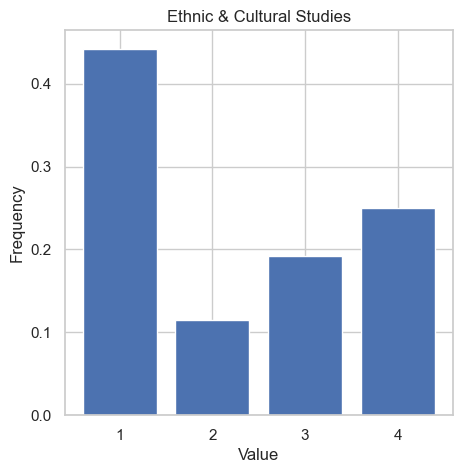

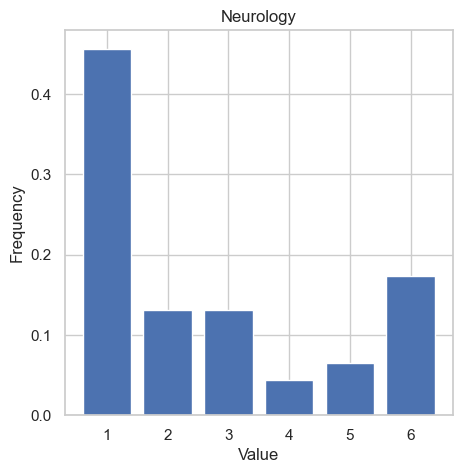

In [120]:
import networkx as nx
import scipy.sparse
from scipy.sparse.linalg import minres

import matplotlib.pyplot as plt

for field_name, G in Gs.items():

    cores = np.fromiter(nx.core_number(G).values(), int)

    unique, counts = np.unique(cores, return_counts=True)
    freq = counts/len(cores)

    plt.figure(figsize=(5, 5))
    plt.bar(unique, freq)

    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.title(f'{field_name}')

    plt.show()

In [ ]:
# SVD



In [72]:


# Generate complete network
complete_network = nx.complete_graph(10)
# gnp_network = nx.complete_graph(10)

# Generate G(n,p) network
gnp_network = nx.gnp_random_graph(10, 0.3)

# Convert networks to adjacency matrices
complete_matrix = nx.adjacency_matrix(complete_network).todense()
gnp_matrix = nx.adjacency_matrix(gnp_network).todense()

# Perform SVD
U_complete, s_complete, V_complete = np.linalg.svd(complete_matrix)
U_gnp, s_gnp, V_gnp = np.linalg.svd(gnp_matrix)

# Compare singular values
print("Singular Values Comparison:")
print("Complete Network:", s_complete)
print("G(n,p) Network:", s_gnp)

# Compare U matrices (using Frobenius norm)
u_norm = np.linalg.norm(U_complete - U_gnp, ord='fro')
print("\nU Matrix Comparison (Frobenius Norm):", u_norm)

# Compare V matrices (using Frobenius norm)
v_norm = np.linalg.norm(V_complete - V_gnp, ord='fro')
print("V Matrix Comparison (Frobenius Norm):", v_norm)

Singular Values Comparison:
Complete Network: [9. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
G(n,p) Network: [3.42431915 2.33786939 2.29710319 1.98611233 1.36981374 1.32900253
 1.25971928 0.47128047 0.36128652 0.0701179 ]

U Matrix Comparison (Frobenius Norm): 4.149762628378097
V Matrix Comparison (Frobenius Norm): 4.315593705721315


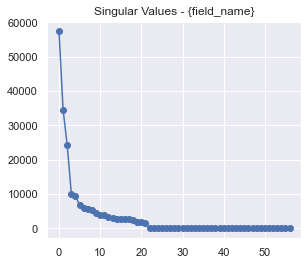

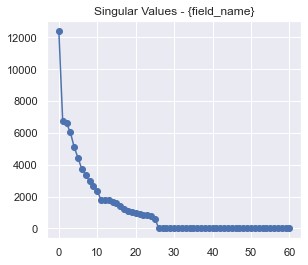

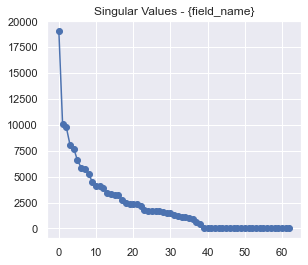

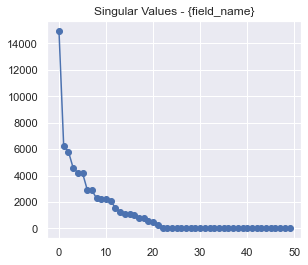

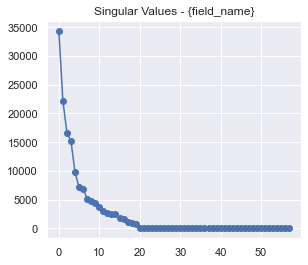

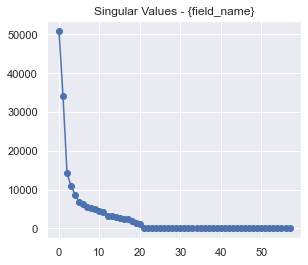

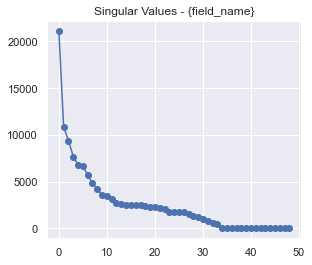

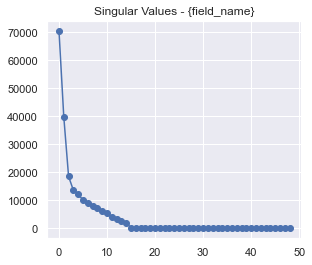

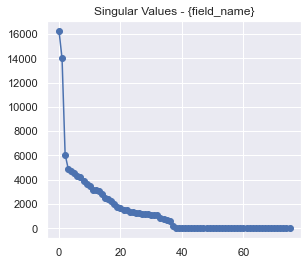

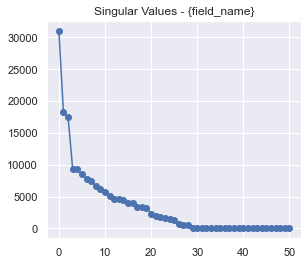

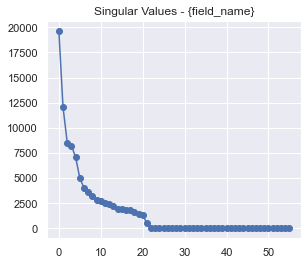

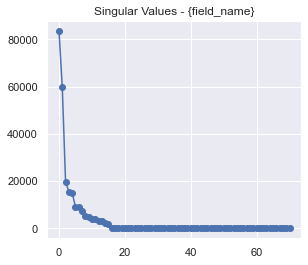

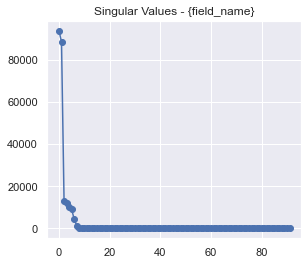

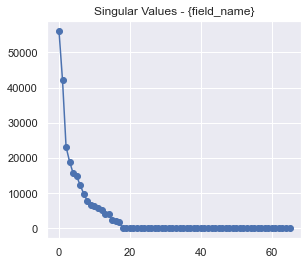

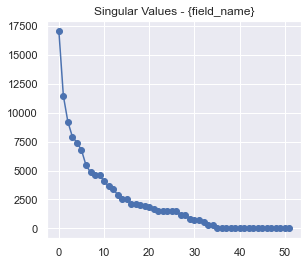

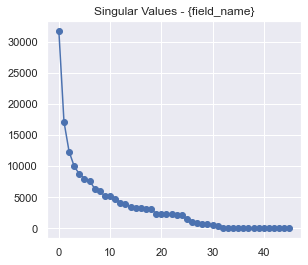

In [40]:
for field_name, G in Gs.items():
    
    M = nx.adjacency_matrix(G).todense()

    U_M, s_M, V_M = np.linalg.svd(M)

    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.plot(s_M, 'b-o')
    plt.title(f"Singular Values - {field_name}")



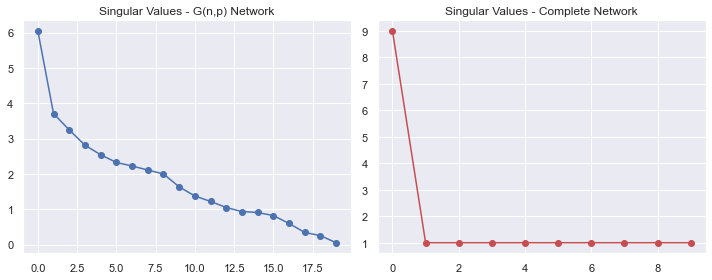

In [38]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# G(n,p) network generation
n = 20  # Number of nodes in G(n,p) network
p = 0.3  # Probability of an edge in G(n,p) network

gnp_network = nx.fast_gnp_random_graph(n, p)
gnp_adj_matrix = nx.to_numpy_array(gnp_network)

# Complete network generation
k = 10  # Number of nodes in complete network

complete_network = nx.complete_graph(k)
complete_adj_matrix = nx.to_numpy_array(complete_network)

# Perform SVD
gnp_U, gnp_S, gnp_Vt = np.linalg.svd(gnp_adj_matrix)
complete_U, complete_S, complete_Vt = np.linalg.svd(complete_adj_matrix)

# Plot singular values
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(gnp_S, 'b-o')
plt.title("Singular Values - G(n,p) Network")

plt.subplot(122)
plt.plot(complete_S, 'r-o')
plt.title("Singular Values - Complete Network")

plt.tight_layout()
plt.show()


In [39]:
import networkx as nx
import numpy as np

# G(n,p) network generation
n = 20  # Number of nodes in G(n,p) network
p = 0.3  # Probability of an edge in G(n,p) network

gnp_network = nx.fast_gnp_random_graph(n, p)
gnp_adj_matrix = nx.to_numpy_array(gnp_network)

# Complete network generation
k = 10  # Number of nodes in complete network

complete_network = nx.complete_graph(k)
complete_adj_matrix = nx.to_numpy_array(complete_network)

# Perform SVD
gnp_U, gnp_S, gnp_Vt = np.linalg.svd(gnp_adj_matrix)
complete_U, complete_S, complete_Vt = np.linalg.svd(complete_adj_matrix)

# Singular Value Decay
gnp_decay = np.diff(gnp_S)
complete_decay = np.diff(complete_S)

# Singular Value Ratio
gnp_ratio = gnp_S[0] / gnp_S[np.nonzero(gnp_S)[0][-1]]
complete_ratio = complete_S[0] / complete_S[np.nonzero(complete_S)[0][-1]]

# Rank Comparison
gnp_rank = np.count_nonzero(gnp_S)
complete_rank = np.count_nonzero(complete_S)

# Reconstruction Error
gnp_reconstructed = gnp_U[:, :gnp_rank] @ np.diag(gnp_S[:gnp_rank]) @ gnp_Vt[:gnp_rank, :]
gnp_error = np.linalg.norm(gnp_adj_matrix - gnp_reconstructed)
complete_reconstructed = complete_U[:, :complete_rank] @ np.diag(complete_S[:complete_rank]) @ complete_Vt[:complete_rank, :]
complete_error = np.linalg.norm(complete_adj_matrix - complete_reconstructed)

# Print the results
print("Singular Value Decay - G(n,p) Network:", gnp_decay)
print("Singular Value Decay - Complete Network:", complete_decay)
print("Singular Value Ratio - G(n,p) Network:", gnp_ratio)
print("Singular Value Ratio - Complete Network:", complete_ratio)
print("Rank Comparison - G(n,p) Network:", gnp_rank)
print("Rank Comparison - Complete Network:", complete_rank)
print("Reconstruction Error - G(n,p) Network:", gnp_error)
print("Reconstruction Error - Complete Network:", complete_error)

Singular Value Decay - G(n,p) Network: [-2.33562928 -0.7263106  -0.27125557 -0.3308527  -0.08767807 -0.59272973
 -0.03705444 -0.32520726 -0.18036609 -0.10428358 -0.17210969 -0.15732341
 -0.01979953 -0.25609122 -0.01806869 -0.36492798 -0.09168586 -0.15996054
 -0.13521124]
Singular Value Decay - Complete Network: [-8.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16]
Singular Value Ratio - G(n,p) Network: 37.891771849831606
Singular Value Ratio - Complete Network: 9.000000000000002
Rank Comparison - G(n,p) Network: 20
Rank Comparison - Complete Network: 10
Reconstruction Error - G(n,p) Network: 6.713117546181933e-14
Reconstruction Error - Complete Network: 1.648135265729833e-15


In [6]:
import networkx as nx
import pymc3 as pm


pm.__version__

'3.11.5'

In [3]:
n = 100

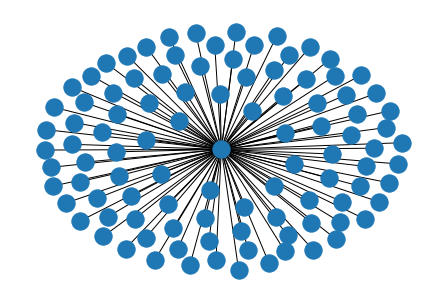

In [14]:
G_star = nx.star_graph(n)
nx.draw(G_star)

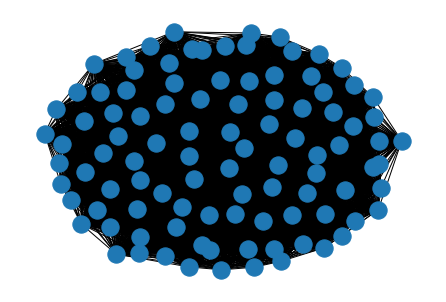

In [15]:
G_star = nx.complete_graph(n)
nx.draw(G_star)

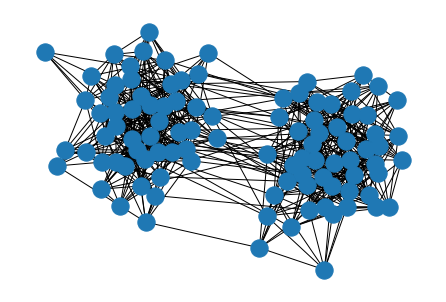

In [16]:
sizes = [int(n/2), int(n/2)]
probs = [[0.25, 0.02], 
         [0.02, 0.25]]
G_sbm_2 = nx.stochastic_block_model(sizes, probs, seed=0)
nx.draw(G_sbm_2)

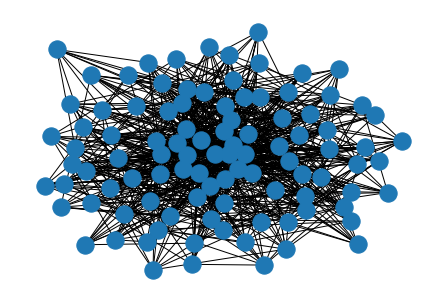

In [17]:
G_powerlaw_cluster = nx.powerlaw_cluster_graph(n, 10, 0.25)
nx.draw(G_powerlaw_cluster)

In [18]:
nx.density(G_powerlaw_cluster)

0.1781818181818182

'3.11.5'

In [3]:
! pip3 install pymc --upgrade


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
